In [1]:
import pandas as pd
import numpy as np
# import datetime
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib
from datetime import datetime
import pickle
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
rc('font', family='default')

with open('/mnt/d/ubuntu/projects/gatechProjects/StochSM/data/gpm_gage_sf.pickle', 'rb') as handle:
    gpm_gage_sf = pickle.load(handle)

gage_gpm_matched = dict()
for i, st_id in enumerate(gpm_gage_sf['lut_gpm_gage']['st_id']):
    fid = str(gpm_gage_sf['lut_gpm_gage']['FID'][i])
    st_id = str(st_id)
    gpm_gage_ = gpm_gage_sf['gpm_gage'][fid]
    sf_gages_ = gpm_gage_sf['sf_gages'][st_id]
    gage_gpm_matched[st_id] = pd.merge(gpm_gage_, sf_gages_)

In [2]:
s_props = pd.read_csv('/mnt/d/ubuntu/projects/gatechProjects/StochSM/data/gages/sm_gages_w_SProps.csv')
prod_list = dict({
                'tscales': ['H'],
                'scale_f': 1,
                'dt_col': 'date',
                'p_cols': ['value', 'PREC_1', 'PREC_2'],
                'p_thres': 0,
                'alias': ['GPM', 'Gage_1', 'Gage_2']
                 })

In [50]:
with open('/mnt/d/ubuntu/projects/gatechProjects/StochSM/data/gages/ARS_data/gpm_gage_sm_event_based.pickle', 'rb') as handle:
    res_event_based = pickle.load(handle)

with open('/mnt/d/ubuntu/projects/gatechProjects/StochSM/data/gages/ARS_data/gpm_gage_sm.pickle', 'rb') as handle:
    res = pickle.load(handle)


In [53]:
res

{'16070001': {'value': {'res_p': array([[0, 0.5525, 0, Timestamp('2013-01-01 05:00:00'), 0],
          [1, 0.5437515591549918, -8.74844084500823,
           Timestamp('2013-01-01 06:00:00'), 0.2625],
          [2, 0.5362549954483657, -7.496563706625982,
           Timestamp('2013-01-01 07:00:00'), 0.2625],
          ...,
          [70096, 0.4456365657464489, -1.2802572499201892,
           Timestamp('2020-12-30 21:00:00'), 0.2625],
          [70097, 0.44438509063183473, -1.251475114614231,
           Timestamp('2020-12-30 22:00:00'), 0.2625],
          [70098, 0.44316104040792487, -1.224050223909849,
           Timestamp('2020-12-30 23:00:00'), 0.2625]], dtype=object),
   'data_p': array([[0, 0, 0, Timestamp('2013-01-01 05:00:00')],
          [1, 0, 0, Timestamp('2013-01-01 06:00:00')],
          [2, 0, 0, Timestamp('2013-01-01 07:00:00')],
          ...,
          [70096, 0, 0, Timestamp('2020-12-30 21:00:00')],
          [70097, 0, 0, Timestamp('2020-12-30 22:00:00')],
          [700

In [59]:


fig,ax = plt.subplots(figsize=(20, 8))

ax.plot(res['16070001'][p_obs]['res_p'][:,3], res['16070001'][p_obs]['res_p'][:,1], color='red')
ax.plot(res_event_based['16070001'][p_obs]['res_p'][:,3], res_event_based['16070001'][p_obs]['res_p'][:,1], color='green')
# v_avg_sm = np.nanmean([gage_gpm_matched['16070001']['SM_10'] ], axis=0)
# ax.plot(gage_gpm_matched[st_id]['date'],gage_gpm_matched[st_id]['SM_50']/0.4, color='blue')
# ax.plot(gage_gpm_matched[st_id]['date'],v_avg_sm, color='blue')

# ax.set_ylim([-.1,1.1])
ax.set_xlim([datetime.datetime(2015,5,1), datetime.datetime(2015,7,1)])
# plt.grid(True, which='major', axis='both', linestyle = (0, (5, 5)))
# ax.tick_params(labelsize = 20)
# ax.set_ylabel(r'$\theta$ (\%)', fontsize = 24)
# ax.legend(fontsize=20)
# fig.tight_layout()
# fig.savefig('/mnt/d/ubuntu/projects/gatechProjects/StochSM/figures/initial_results/model_sm_daily_all_years.jpg', dpi=300)

(16556.0, 16617.0)

# Event-based rainfall data

<ipython-input-52-8889b1b02b23>:4: RuntimeWarning: Mean of empty slice
  v_avg_sm = np.nanmean([gage_gpm_matched[st_id]['SM_10'] ], axis=0)


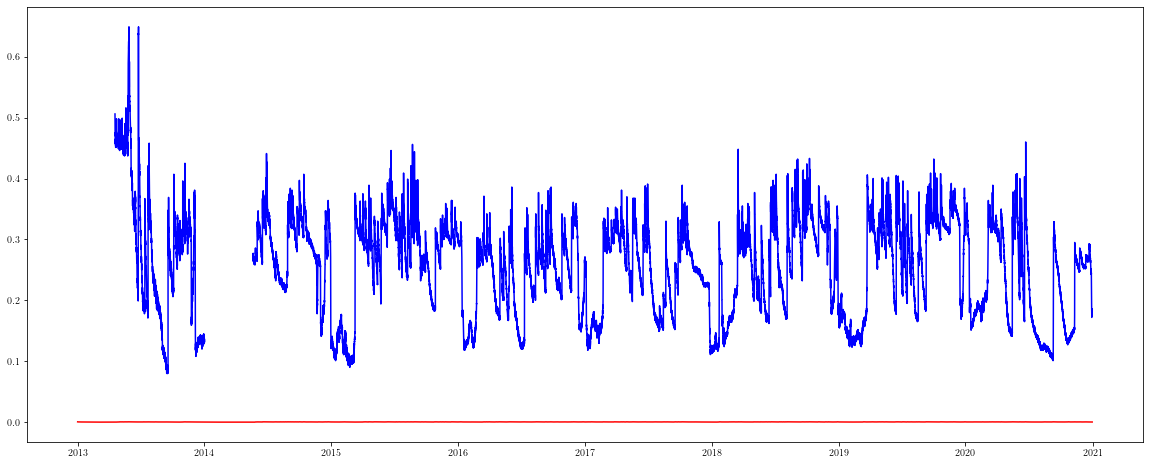

In [52]:

fig,ax = plt.subplots(figsize=(20, 8))

ax.plot(results[st_id][p_obs]['res_p'][:,3], results[st_id][p_obs]['res_p'][:,1]/theta_s_mm*theta_s, color='red')
v_avg_sm = np.nanmean([gage_gpm_matched[st_id]['SM_10'] ], axis=0)
# ax.plot(gage_gpm_matched[st_id]['date'],gage_gpm_matched[st_id]['SM_50']/0.4, color='blue')
ax.plot(gage_gpm_matched[st_id]['date'],v_avg_sm, color='blue')

# ax.set_ylim([-.1,1.1])
# ax.set_xlim([datetime(2015,5,1), datetime(2015,7,1)])
# plt.grid(True, which='major', axis='both', linestyle = (0, (5, 5)))
# ax.tick_params(labelsize = 20)
# ax.set_ylabel(r'$\theta$ (\%)', fontsize = 24)
# ax.legend(fontsize=20)
# fig.tight_layout()
# fig.savefig('/mnt/d/ubuntu/projects/gatechProjects/StochSM/figures/initial_results/model_sm_daily_all_years.jpg', dpi=300)

In [48]:
st_id

'16070001'

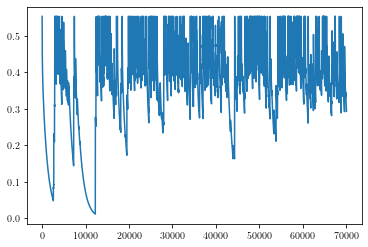

In [47]:
plt.plot(results[st_id][p_obs]['res_p'][:,1])

In [20]:
gage_gpm_event_based[st_id] = pd.DataFrame({'date':p_new['value']['date'],
'value':p_new['value']['value'],'PREC_1': p_new['PREC_1']['PREC_1'], 'PREC_2': p_new['PREC_2']['PREC_2']})

In [21]:
gage_gpm_event_based[st_id]

,date,value,PREC_1,PREC_2
0,2013-01-01 05:00:00,0.0,0.0,0.0


In [22]:
pd.DataFrame({'date':gage_gpm_matched[st_id]['date'], 
            'SM_5':gage_gpm_matched[st_id]['SM_5'] ,
            'SM_10': gage_gpm_matched[st_id]['SM_10'] ,
            'SM_20': gage_gpm_matched[st_id]['SM_20'] ,
            'SM_50': gage_gpm_matched[st_id]['SM_50'],
            'SM_avg':np.nanmean([gage_gpm_matched[st_id]['SM_5'] , gage_gpm_matched[st_id]['SM_10'] , gage_gpm_matched[st_id]['SM_20'] , gage_gpm_matched[st_id]['SM_50'] ], axis=0)}
            ,dtype=object)

<ipython-input-22-0ab9e2f1ac33>:6: RuntimeWarning: Mean of empty slice
  'SM_avg':np.nanmean([gage_gpm_matched[st_id]['SM_5'] , gage_gpm_matched[st_id]['SM_10'] , gage_gpm_matched[st_id]['SM_20'] , gage_gpm_matched[st_id]['SM_50'] ], axis=0)}


,date,SM_5,SM_10,SM_20,SM_50,SM_avg
0,2013-01-01 05:00:00,NaN,NaN,NaN,NaN,NaN
1,2013-01-01 06:00:00,NaN,NaN,NaN,NaN,NaN
2,2013-01-01 07:00:00,NaN,NaN,NaN,NaN,NaN
3,2013-01-01 08:00:00,NaN,NaN,NaN,NaN,NaN
4,2013-01-01 09:00:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
70094,2020-12-30 19:00:00,NaN,0.183,0.245,NaN,0.214
70095,2020-12-30 20:00:00,NaN,0.185,0.245,NaN,0.215
70096,2020-12-30 21:00:00,NaN,0.186,0.245,NaN,0.2155
70097,2020-12-30 22:00:00,NaN,0.186,0.246,NaN,0.216


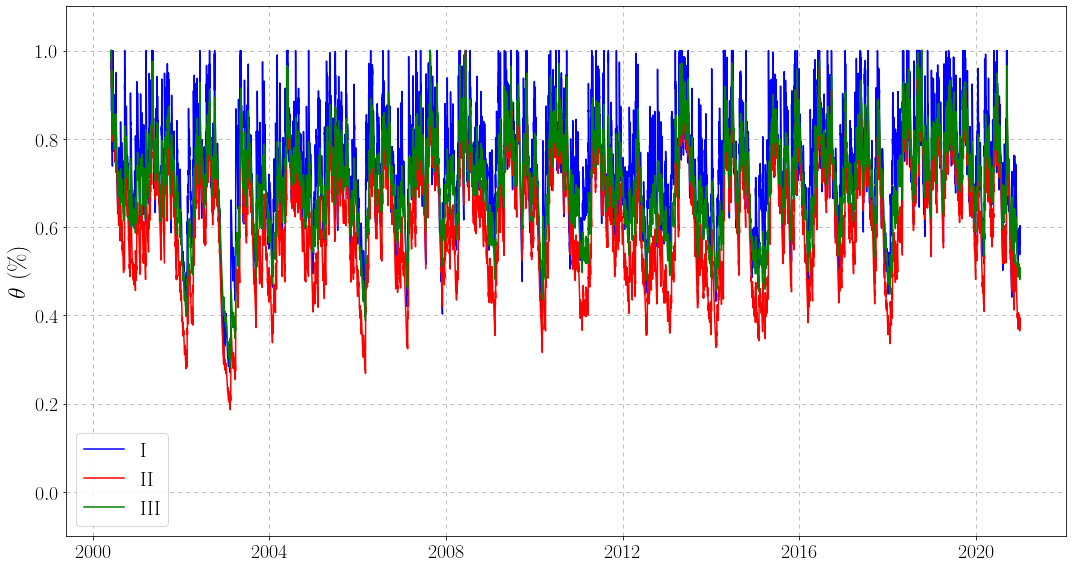

In [23]:
import matplotlib
from datetime import datetime
# load the xfrac package
# matplotlib.rcParams["text.latex.preamble"] = r'\usepackage[dvips]{graphicx}\usepackage{xfrac}'

# xlimits = [(0,)]
fig,ax = plt.subplots(figsize=(15, 8))
# ax1 = ax.twinx()
# ax1.plot(precip_data['dt'], precip_data['precipitationCal'], color='blue', alpha=0.5)
tscale = 'H'
# res_p, data_p = sm_model(data, theta_i, theta_s, theta_star, et_p, yaron_c)
for i in range(1,4):
    ax.plot(results[tscale][i]['res_p'][:,3], (results[tscale][i]['res_p'][:,1]/run_sets[i]['theta_s']), color=run_sets[i]['color'], label=i*'I')
    # ax.annotate(i*'I', xy=(results_et[i]['res_p'][-30, 0] , results_et[i]['res_p'][-30, 1]/run_sets[i]['theta_s'] ),xytext=(results_et[i]['res_p'][-20, 0], results_et[i]['res_p'][-18, 1]/run_sets[i]['theta_s']+0.1*results_et[i]['res_p'][-10, 1]/run_sets[i]['theta_s']),transform=ax.transAxes,
    #         fontsize=20,rotation=-10 )

ax.set_ylim([-.1,1.1])
# xlimits = [0, 70]
# ax.set_xlim([datetime(2015,1,1), datetime(2016, 12,31)])
# ax1.set_xlim(xlimits)
# ax.set_ylim([0,.4])
plt.grid(True, which='major', axis='both', linestyle = (0, (5, 5)))
ax.tick_params(labelsize = 20)
# ax1.tick_params(labelsize = 20)
ax.set_ylabel(r'$\theta$ (\%)', fontsize = 24)
# ax1.set_ylabel(r'P (mm)', fontsize = 24)
# ax.set_xlabel(r'Time (days)', fontsize = 24)
ax.legend(fontsize=20)
fig.tight_layout()
fig.savefig('/mnt/d/ubuntu/projects/gatechProjects/StochSM/figures/initial_results/model_sm_hourly_all_years.jpg', dpi=300)

In [173]:
results_all = dict()
for stage in stages:
    results_all[stage] = []
    for init in np.arange(50, run_sets[1]['theta_s'], 5):
        for x in results[stage][init]['res_p']:
            for y in x:
                results_all[stage].append(list(y) + [init])
    results_all[stage] = pd.DataFrame(results_all[stage])

In [17]:
import pickle
with open('/mnt/d/ubuntu/projects/gatechProjects/StochSM/data/sim_test_GPM_hourly.pickle', 'wb') as handle:
    pickle.dump(results_all, handle, protocol= pickle.HIGHEST_PROTOCOL)

In [177]:
mean_sm = dict()
sd_sm = dict()
for stage in [4,5,6]:
    mean_sm[stage] = dict()
    sd_sm[stage] = dict()
    for ds in range(1,5):
        mean_sm[stage][ds] = []
        sd_sm[stage][ds] = []
        for init in np.arange(50, run_sets[1]['theta_s'], 5):
            idx = (results_all[stage][5]==init) & (results_all[stage][3].dt.dayofyear==(152-(6-stage)*30)+ds*8) & (results_all[stage][3].dt.hour==1)

            mean_sm[stage][ds].append((init, np.mean(results_all[stage].loc[idx][1])))
            sd_sm[stage][ds].append((init, np.std(results_all[stage].loc[idx][1])))

        mean_sm[stage][ds] = np.array(mean_sm[stage][ds])
        sd_sm[stage][ds] = np.array(sd_sm[stage][ds])

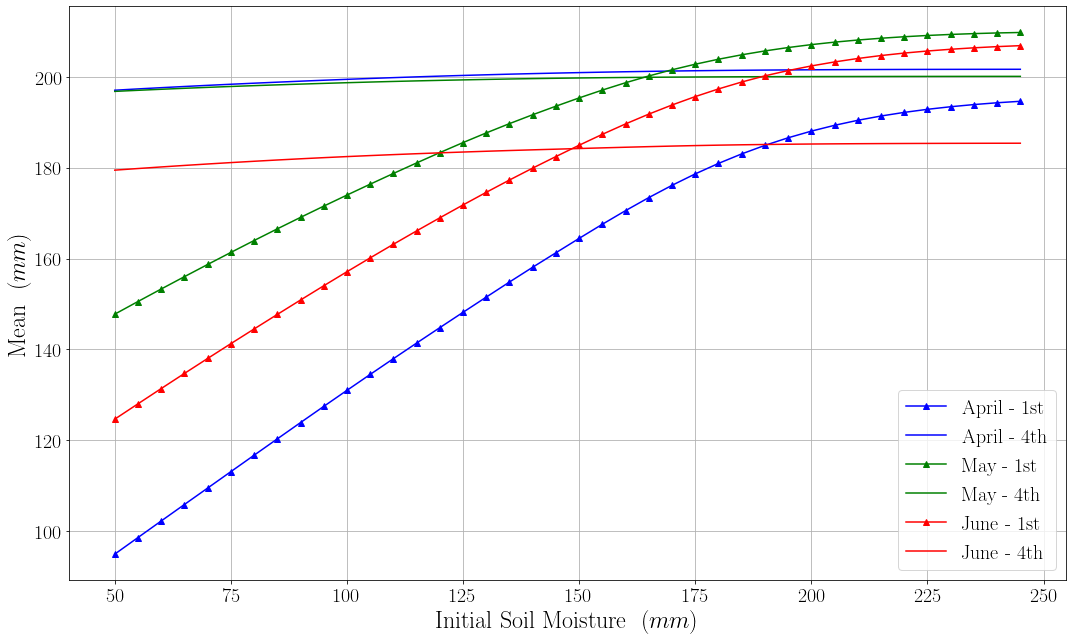

In [180]:
fig,ax = plt.subplots(figsize=(15, 9))
ax.tick_params(labelsize = 20)
ax.set_ylabel(r'Mean \ ($mm$)', fontsize = 24)
ax.set_xlabel(r'Initial Soil Moisture \ ($mm$)', fontsize = 24)
ax.tick_params(labelsize = 20)
plt.plot(mean_sm[4][1][:,0],mean_sm[4][1][:,1], color='blue', marker='^', label = 'April - 1st')
plt.plot(mean_sm[4][4][:,0],mean_sm[4][4][:,1], color='blue', label = 'April - 4th')
plt.plot(mean_sm[5][1][:,0],mean_sm[5][1][:,1], color='g', marker='^',label = 'May - 1st')
plt.plot(mean_sm[5][4][:,0],mean_sm[5][4][:,1], color='g', label = 'May - 4th')
plt.plot(mean_sm[6][1][:,0],mean_sm[6][1][:,1], color='red', marker='^', label = 'June - 1st')
plt.plot(mean_sm[6][4][:,0],mean_sm[6][4][:,1], color='red', label = 'June - 4th')
ax.grid('major')
ax.legend(fontsize=20)
# ax.set_ylim([0,])
fig.tight_layout()
fig.savefig('/mnt/d/ubuntu/projects/gatechProjects/StochSM/figures/initial_results/mean_sm_hourly.jpg', dpi=300)

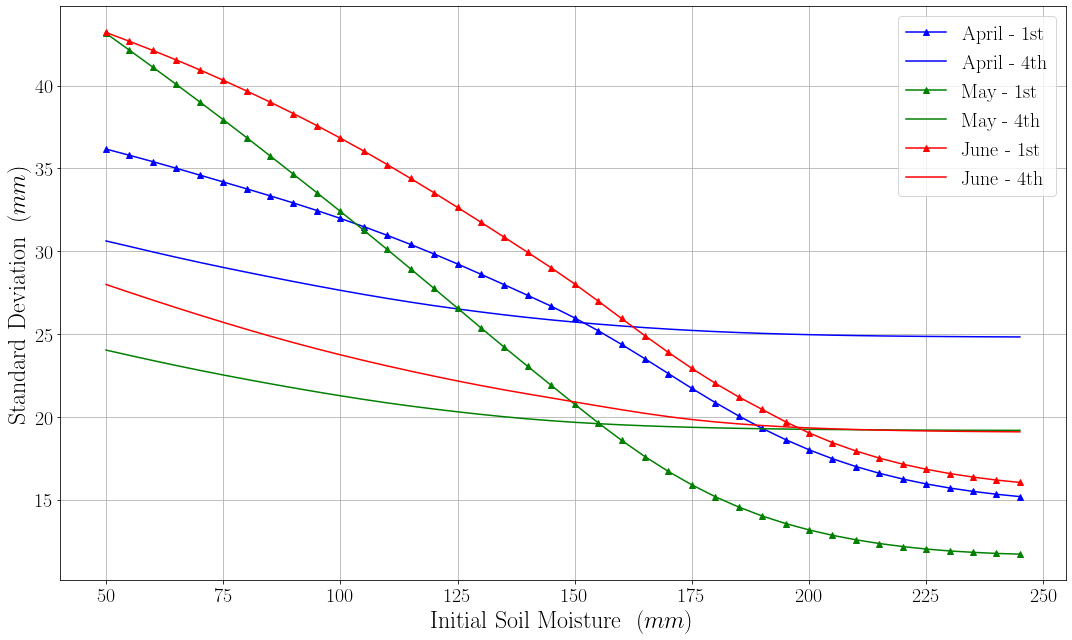

In [181]:

fig,ax = plt.subplots(figsize=(15, 9))
ax.tick_params(labelsize = 20)
ax.set_ylabel(r'Standard Deviation \ ($mm$)', fontsize = 24)
ax.set_xlabel(r'Initial Soil Moisture \ ($mm$)', fontsize = 24)
ax.tick_params(labelsize = 20)
plt.plot(sd_sm[4][1][:,0],sd_sm[4][1][:,1], color='blue', marker='^', label = 'April - 8 days')
plt.plot(sd_sm[4][4][:,0],sd_sm[4][4][:,1], color='blue', label = 'April - 32 days')
plt.plot(sd_sm[5][1][:,0],sd_sm[5][1][:,1], color='g', marker='^',label = 'May - 8 days')
plt.plot(sd_sm[5][4][:,0],sd_sm[5][4][:,1], color='g', label = 'May - 32 days')
plt.plot(sd_sm[6][1][:,0],sd_sm[6][1][:,1], color='red', marker='^', label = 'June - 8 days')
plt.plot(sd_sm[6][4][:,0],sd_sm[6][4][:,1], color='red', label = 'June - 32 days')
ax.grid('major')
ax.legend(fontsize=20)
fig.tight_layout()
fig.savefig('/mnt/d/ubuntu/projects/gatechProjects/StochSM/figures/initial_results/sd_sm_hourly.jpg', dpi=300)

## Monte Carlo simulations on monthly basis with hourly rainfall and event-based
Initial soil moisture $\theta_i$ is assumed to be variable at the beginning of the simulations. 
- simulations with initial soil moisture conditions from Permanent Wilting Point to Saturation
- simulations  
- three time period are considered in here: 
    - Before vegetation growth season (April)
    - During vegetation growth season (May)
    - During vegetation is full developed (June)

### Preprocess rainfall from hourly to event-based rainfall time-series

In [2]:
from functions.event_detector import storm_def
import datetime

mit_list = [9]
tscale= 'H'
p_events = dict()
for prod in ['GPM']:
    _prod = prod_list[prod]
    dt_col = _prod['dt_col']
    p_col = _prod['p_col']
    p_events[prod] = dict()    
    for tscale in ['H']:
        data = p_data[prod][tscale]
        mit_dry = []
        # events = dict()
        # dry_periods = dict()
        # storm_arrivals = dict()
        # p_events[prod][tscale] = dict()
        for mit in mit_list:
            events = storm_def(data, mit)
            dry_periods = [(events['start'][i+1] - events['end'][i]).total_seconds()/3600.0 for i in range(len(events)-1)]
            storm_arrivals = [(events['start'][i+1] - events['start'][i]).total_seconds()/3600.0 for i in range(len(events)-1)]
            mit_dry.append((mit, np.std(dry_periods)/ np.mean(dry_periods),np.std(storm_arrivals)/ np.mean(storm_arrivals), 
            np.mean(dry_periods), np.mean(storm_arrivals)))
        p_events[prod][tscale] = np.array(mit_dry)

In [3]:
p_new = []
for event in events.itertuples():
    for n in range(int(event.deltat)):
        p_new.append((event.start+datetime.timedelta(hours=n), event.precip))
p_new = pd.DataFrame(p_new, columns=['timestamps','rain'])
p_new = p_new.set_index('timestamps')
dates = pd.date_range('2000/06/01', '2020/12/31', freq='H')
dates.name = 'timestamps'
p_new = p_new.reindex(dates).fillna(0)
p_new = p_new.reset_index()

In [4]:
from functions.check_model import sm_model_time_based,sm_model
run_sets = dict()
run_sets[1] = dict()
run_sets[2] = dict()
run_sets[3] = dict()
run_sets[1]['et_p'] = 3.1
run_sets[1]['theta_i'] = 246
run_sets[1]['theta_wp'] = 74
run_sets[1]['theta_star'] = 143.1 # Field Capacity
run_sets[1]['theta_s'] = 246
run_sets[1]['yaron_c'] = 0.022
run_sets[1]['color'] = 'blue'


run_sets[2]['et_p'] = 6.3
run_sets[2]['theta_i'] = 574
run_sets[2]['theta_wp'] = 173
run_sets[2]['theta_star'] = 330 # Field Capacity
run_sets[2]['theta_s'] = 574
run_sets[2]['yaron_c'] = 0.022
run_sets[2]['color'] = 'red'

run_sets[3]['et_p'] = 4.6
run_sets[3]['theta_i'] = 574
run_sets[3]['theta_wp'] = 173
run_sets[3]['theta_star'] = 330 # Field Capacity
run_sets[3]['theta_s'] = 574
run_sets[3]['yaron_c'] = 0.014
run_sets[3]['color'] = 'green'

results_pevents = dict()
div_fac = {'30min':24*2, 'H':24, 'D':1}
div_fac1 = {'30min':24, 'H':24, 'D':1}
tscale='H'
data_forcing = []

for i, p in enumerate(p_new['rain']):
    if p>0.5:
        data_forcing.append((i, 1, p*div_fac[tscale], p_new['timestamps'].loc[i]))
        # data_forcing.append((i, 1, p, p_data['GPM'][tscale]['timestamps'].loc[i]))
    else:
        data_forcing.append((i, 0, 0, p_new['timestamps'].loc[i]))
for i in range(1,4):
    results_pevents[i] = dict()
    et_p = run_sets[i]['et_p']
    theta_i = run_sets[i]['theta_i']
    theta_wp = run_sets[i]['theta_wp']
    theta_star = run_sets[i]['theta_star']
    theta_s = run_sets[i]['theta_s']
    yaron_c = run_sets[i]['yaron_c']
    
    results_pevents[i]['res_p'], results_pevents[i]['data_p'] = sm_model_time_based(data_forcing, theta_i, theta_s, theta_wp, theta_star, et_p/div_fac[tscale], yaron_c, tscale)
        # results[tscale][i]['res_p'], results[tscale][i]['data_p'] = sm_model(data_forcing, theta_i, theta_s, theta_wp, theta_star, et_p, yaron_c)

KeyboardInterrupt: 

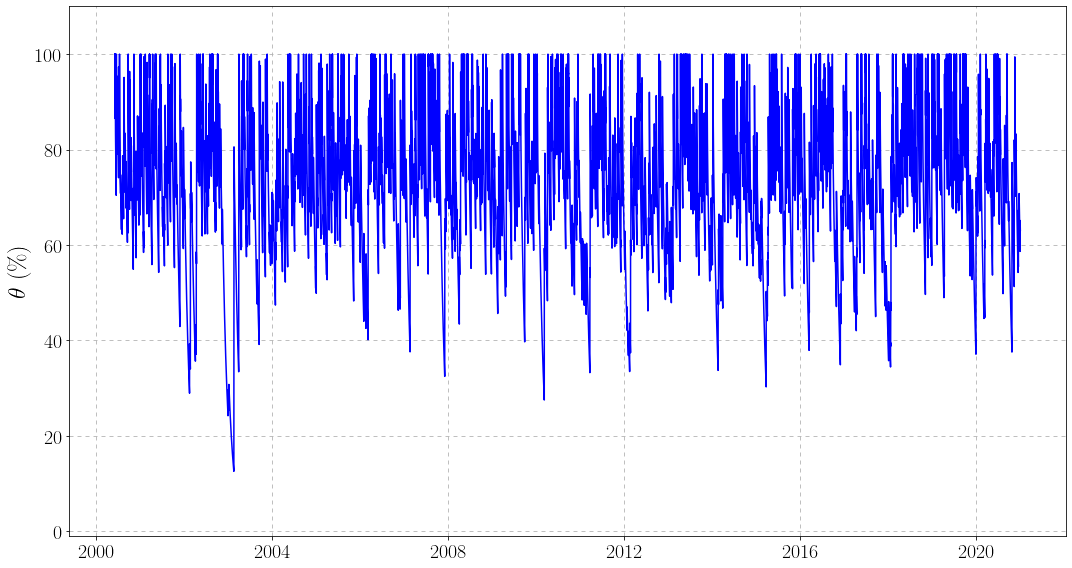

In [7]:
import matplotlib
from datetime import datetime
# load the xfrac package
# matplotlib.rcParams["text.latex.preamble"] = r'\usepackage[dvips]{graphicx}\usepackage{xfrac}'

# xlimits = [(0,)]
fig,ax = plt.subplots(figsize=(15, 8))
# ax1 = ax.twinx()
# ax1.plot(precip_data['dt'], precip_data['precipitationCal'], color='blue', alpha=0.5)
tscale = 'H'
# res_p, data_p = sm_model(data, theta_i, theta_s, theta_star, et_p, yaron_c)
for i in range(1,2):
    ax.plot(results_pevents[i]['res_p'][:,3], (results_pevents[i]['res_p'][:,1]/run_sets[i]['theta_s'])*100, color=run_sets[i]['color'], label=i*'I')
    # ax.annotate(i*'I', xy=(results_et[i]['res_p'][-30, 0] , results_et[i]['res_p'][-30, 1]/run_sets[i]['theta_s'] ),xytext=(results_et[i]['res_p'][-20, 0], results_et[i]['res_p'][-18, 1]/run_sets[i]['theta_s']+0.1*results_et[i]['res_p'][-10, 1]/run_sets[i]['theta_s']),transform=ax.transAxes,
    #         fontsize=20,rotation=-10 )

ax.set_ylim([-1,110])
# xlimits = [0, 70]
# ax.set_xlim([datetime(2015,1,1), datetime(2016, 6,30)])
# ax1.set_xlim(xlimits)
# ax.set_ylim([0,.4])
plt.grid(True, which='major', axis='both', linestyle = (0, (5, 5)))
ax.tick_params(labelsize = 20)
# ax1.tick_params(labelsize = 20)
ax.set_ylabel(r'$\theta \ (\%)$', fontsize = 24)
# ax1.set_ylabel(r'P (mm)', fontsize = 24)
# ax.set_xlabel(r'Time (days)', fontsize = 24)
# ax.legend(fontsize=20,loc='lower right')
fig.tight_layout()
fig.savefig('/mnt/d/ubuntu/projects/gatechProjects/StochSM/figures/initial_results/model_sm_eventbased_growth_periodI.jpg', dpi=300)

In [5]:
from functions.check_model import sm_model_time_based,sm_model
import datetime
stages = [4, 5, 6]
run_sets = dict()
run_sets[1] = dict()
run_sets[1]['et_p'] = 3.1
run_sets[1]['theta_i'] = 246
run_sets[1]['theta_wp'] = 74
run_sets[1]['theta_star'] = 143.1 # Field Capacity
run_sets[1]['theta_s'] = 246
run_sets[1]['yaron_c'] = 0.022
run_sets[1]['color'] = 'blue'
tscale = 'H'
results_pevents_mc = dict()
div_fac = {'30min':24*2, 'H':24, 'D':1}
div_fac1 = {'30min':24, 'H':24, 'D':1}
for stage in stages:
    results_pevents_mc[stage] = dict()
    for init in np.arange(50, run_sets[1]['theta_s'], 5):
        results_pevents_mc[stage][init] = dict()  
        res_p = []
        data_p = []
        for year in range(2001,2021):
            data_forcing = []
            idx = (p_new['timestamps']>pd.Timestamp(datetime.date(year,stage,1))) & (p_new['timestamps']<pd.Timestamp(datetime.date(year,stage,1) + datetime.timedelta(days=35)))
            filtered = p_new.loc[idx]
            for i, p in enumerate(filtered['rain'].values):
                if p>0.5:
                    data_forcing.append((i, 1, p*div_fac[tscale], filtered['timestamps'].iloc[i]))
                    # data_forcing.append((i, 1, p, p_data['GPM'][tscale]['timestamps'].loc[i]))
                else:
                    data_forcing.append((i, 0, 0, filtered['timestamps'].iloc[i]))
            
            et_p = run_sets[1]['et_p']
            theta_i = init
            theta_wp = run_sets[1]['theta_wp']
            theta_star = run_sets[1]['theta_star']
            theta_s = run_sets[1]['theta_s']
            yaron_c = run_sets[1]['yaron_c']
            _res_p, _data_p = sm_model_time_based(data_forcing, theta_i, theta_s, theta_wp, theta_star, et_p/div_fac[tscale], yaron_c, tscale)
            res_p.append(_res_p)
            data_p.append(_data_p)
        results_pevents_mc[stage][init]['res_p']  = res_p
        results_pevents_mc[stage][init]['p_data'] = data_p

In [6]:
results_all_eventbased = dict()
for stage in stages:
    results_all_eventbased[stage] = []
    for init in np.arange(50, run_sets[1]['theta_s'], 5):
        for x in results_pevents_mc[stage][init]['res_p']:
            for y in x:
                results_all_eventbased[stage].append(list(y) + [init])
    results_all_eventbased[stage] = pd.DataFrame(results_all_eventbased[stage])

In [324]:
import pickle
with open('/mnt/d/ubuntu/projects/gatechProjects/StochSM/data/sim_test_GPM_hourly_eventbased.pickle', 'wb') as handle:
    pickle.dump(results_all_eventbased, handle, protocol= pickle.HIGHEST_PROTOCOL)

In [8]:
mean_sm = dict()
sd_sm = dict()
for stage in [4,5,6]:
    mean_sm[stage] = dict()
    sd_sm[stage] = dict()
    for ds in range(1,5):
        mean_sm[stage][ds] = []
        sd_sm[stage][ds] = []
        for init in np.arange(50, run_sets[1]['theta_s'], 5):
            idx = (results_all_eventbased[stage][5]==init) & (results_all_eventbased[stage][3].dt.dayofyear==(152-(6-stage)*30)+ds*8) & (results_all_eventbased[stage][3].dt.hour==1)

            mean_sm[stage][ds].append((init, np.mean(results_all_eventbased[stage].loc[idx][1])))
            sd_sm[stage][ds].append((init, np.std(results_all_eventbased[stage].loc[idx][1])))

        mean_sm[stage][ds] = np.array(mean_sm[stage][ds])
        sd_sm[stage][ds] = np.array(sd_sm[stage][ds])

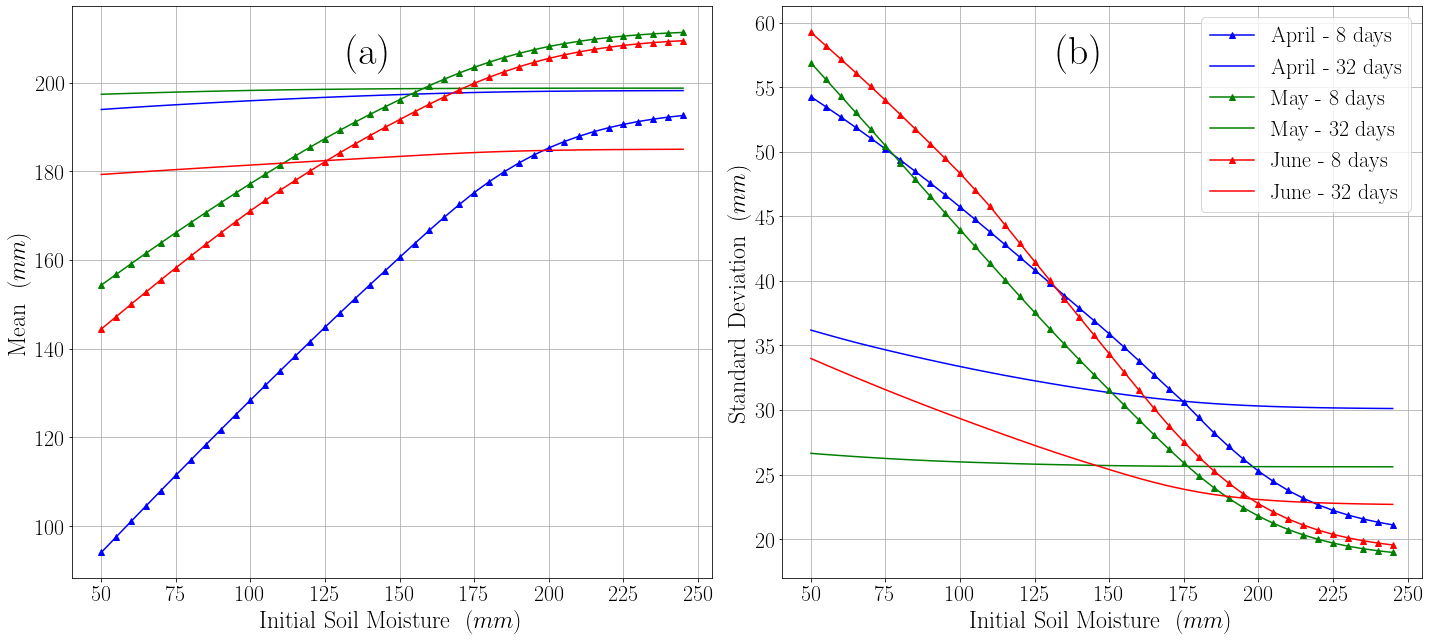

In [22]:
fig,ax = plt.subplots(1,2,figsize=(20, 9))
ax[0].tick_params(labelsize = 22)
ax[0].set_ylabel(r'Mean \ ($mm$)', fontsize = 24)
ax[0].set_xlabel(r'Initial Soil Moisture \ ($mm$)', fontsize = 24)
ax[0].tick_params(labelsize = 22)
ax[0].plot(mean_sm[4][1][:,0],mean_sm[4][1][:,1], color='blue', marker='^', label = 'April - 1st')
ax[0].plot(mean_sm[4][4][:,0],mean_sm[4][4][:,1], color='blue', label = 'April - 4th')
ax[0].plot(mean_sm[5][1][:,0],mean_sm[5][1][:,1], color='g', marker='^',label = 'May - 1st')
ax[0].plot(mean_sm[5][4][:,0],mean_sm[5][4][:,1], color='g', label = 'May - 4th')
ax[0].plot(mean_sm[6][1][:,0],mean_sm[6][1][:,1], color='red', marker='^', label = 'June - 1st')
ax[0].plot(mean_sm[6][4][:,0],mean_sm[6][4][:,1], color='red', label = 'June - 4th')
ax[0].grid('major')


# ax[0].legend(fontsize=20)
# # ax.set_ylim([0,])
# fig.tight_layout()
# fig.savefig('/mnt/d/ubuntu/projects/gatechProjects/StochSM/figures/initial_results/mean_sm_hourly_eventbased.jpg', dpi=300)
# fig,ax = plt.subplots(figsize=(15, 9))
ax[1].tick_params(labelsize = 22)
ax[1].set_ylabel(r'Standard Deviation \ ($mm$)', fontsize = 24)
ax[1].set_xlabel(r'Initial Soil Moisture \ ($mm$)', fontsize = 24)

ax[1].plot(sd_sm[4][1][:,0],sd_sm[4][1][:,1], color='blue', marker='^', label = 'April - 8 days')
ax[1].plot(sd_sm[4][4][:,0],sd_sm[4][4][:,1], color='blue', label = 'April - 32 days')
ax[1].plot(sd_sm[5][1][:,0],sd_sm[5][1][:,1], color='g', marker='^',label = 'May - 8 days')
ax[1].plot(sd_sm[5][4][:,0],sd_sm[5][4][:,1], color='g', label = 'May - 32 days')
ax[1].plot(sd_sm[6][1][:,0],sd_sm[6][1][:,1], color='red', marker='^', label = 'June - 8 days')
ax[1].plot(sd_sm[6][4][:,0],sd_sm[6][4][:,1], color='red', label = 'June - 32 days')
ax[1].grid('major')
ax[1].legend(fontsize=22)
fig.tight_layout()
ax[0].text(0.43, 0.9,'(a)',transform=ax[0].transAxes, fontsize = 40, fontweight='bold')
ax[1].text(0.43, 0.9,'(b)',transform=ax[1].transAxes, fontsize = 40, fontweight='bold')
fig.savefig('/mnt/d/ubuntu/projects/gatechProjects/StochSM/figures/initial_results/mean_sd_sm_hourly_eventbased.jpg', dpi=300)

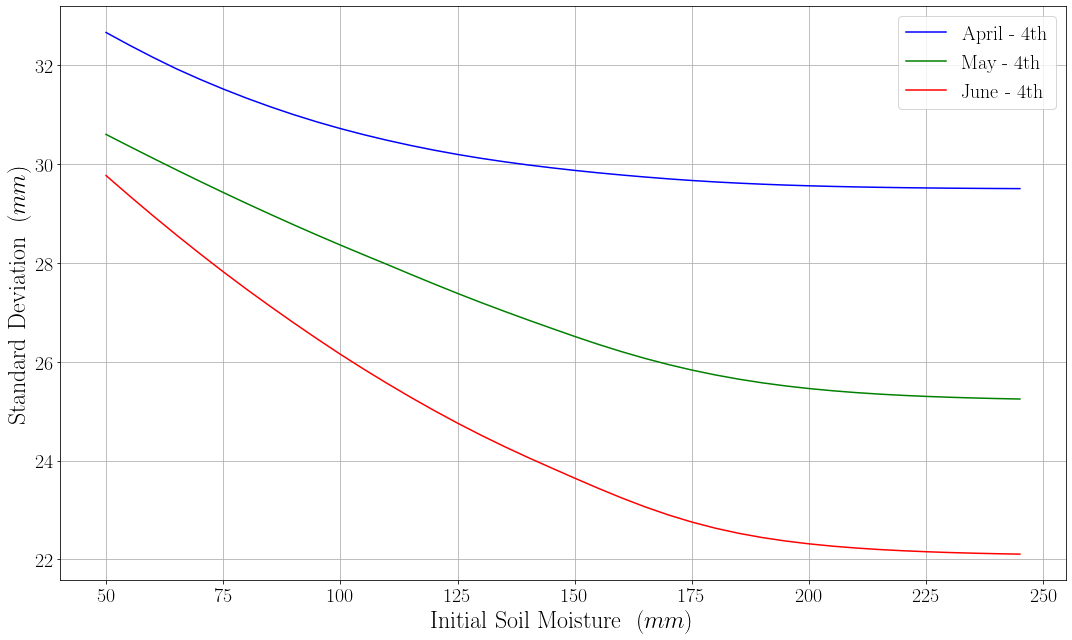

In [268]:
fig,ax = plt.subplots(figsize=(15, 9))
ax.tick_params(labelsize = 20)
ax.set_ylabel(r'Standard Deviation \ ($mm$)', fontsize = 24)
ax.set_xlabel(r'Initial Soil Moisture \ ($mm$)', fontsize = 24)
ax.tick_params(labelsize = 20)
# plt.plot(sd_sm[4][1][:,0],sd_sm[4][1][:,1], color='blue', marker='^', label = 'April - 1st')
plt.plot(sd_sm[4][4][:,0],sd_sm[4][4][:,1], color='blue', label = 'April - 4th')
# plt.plot(sd_sm[5][1][:,0],sd_sm[5][1][:,1], color='g', marker='^',label = 'May - 1st')
plt.plot(sd_sm[5][4][:,0],sd_sm[5][4][:,1], color='g', label = 'May - 4th')
# plt.plot(sd_sm[6][1][:,0],sd_sm[6][1][:,1], color='red', marker='^', label = 'June - 1st')
plt.plot(sd_sm[6][4][:,0],sd_sm[6][4][:,1], color='red', label = 'June - 4th')
ax.grid('major')
ax.legend(fontsize=20)
fig.tight_layout()

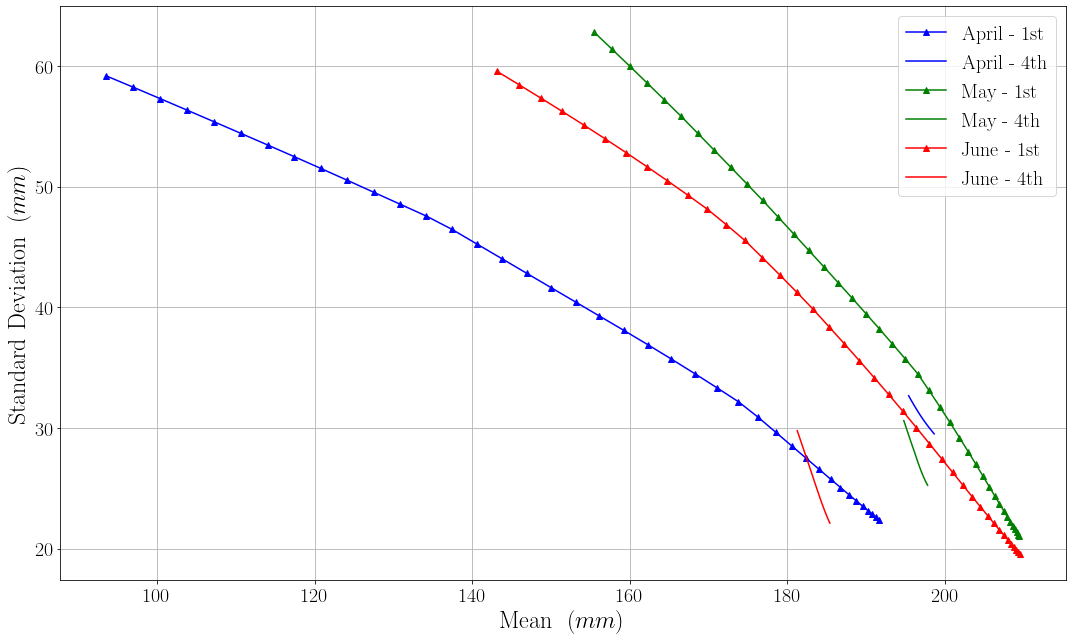

In [269]:
fig,ax = plt.subplots(figsize=(15, 9))
ax.tick_params(labelsize = 20)
ax.set_ylabel(r'Standard Deviation \ ($mm$)', fontsize = 24)
ax.set_xlabel(r'Mean \ ($mm$)', fontsize = 24)
ax.tick_params(labelsize = 20)
plt.plot(mean_sm[4][1][:,1],sd_sm[4][1][:,1], color='blue', marker='^', label = 'April - 1st')
plt.plot(mean_sm[4][4][:,1],sd_sm[4][4][:,1], color='blue', label = 'April - 4th')
plt.plot(mean_sm[5][1][:,1],sd_sm[5][1][:,1], color='g', marker='^',label = 'May - 1st')
plt.plot(mean_sm[5][4][:,1],sd_sm[5][4][:,1], color='g', label = 'May - 4th')
plt.plot(mean_sm[6][1][:,1],sd_sm[6][1][:,1], color='red', marker='^', label = 'June - 1st')
plt.plot(mean_sm[6][4][:,1],sd_sm[6][4][:,1], color='red', label = 'June - 4th')
ax.grid('major')
ax.legend(fontsize=20)
# ax.set_ylim([0,])
fig.tight_layout()
fig.savefig('/mnt/d/ubuntu/projects/gatechProjects/StochSM/figures/initial_results/mean_vs_sd_sm_hourly_eventbased.jpg', dpi=300)


In [272]:
from functions.event_detector import storm_def
import datetime
mit_list = [x for x in range(9,11, 1)]
mit_list = [9]

mean_tb = dict()
p_events = dict()
for prod in ['GPM']:
    _prod = prod_list[prod]
    dt_col = _prod['dt_col']
    p_col = _prod['p_col']
    p_events[prod] = dict()    
    tscale = 'H'
    data = p_data[prod][tscale]
    mit_dry = []
    # events = dict()
    # dry_periods = dict()
    # storm_arrivals = dict()
    # p_events[prod][tscale] = dict()
    mit = 9
    events = storm_def(data, mit)
    dry_periods = [(events['start'][i+1] - events['end'][i]).total_seconds()/3600.0 for i in range(len(events)-1)]
    storm_arrivals = [(events['start'][i+1] - events['start'][i]).total_seconds()/3600.0 for i in range(len(events)-1)]
    mit_dry.append((mit, np.std(dry_periods)/ np.mean(dry_periods),np.std(storm_arrivals)/ np.mean(storm_arrivals), 
    np.mean(dry_periods), np.mean(storm_arrivals)))
    p_events[prod][tscale] = np.array(mit_dry)
    dry_periods = np.array(dry_periods)
    storm_arrivals = np.array(storm_arrivals)
    mean_tb[prod] = np.array([(m, np.mean(dry_periods[list(events['start'][0:-1].dt.month==m)])) for m in range(1,13)])

In [274]:
events['depth'] = events['precip'] * events['deltat']

In [278]:
storm_stats = dict()
for stage in [4,5,6]:
    storm_stats[stage] = dict()
    idx =(events['start'].dt.dayofyear<(152-(6-stage)*30)+32) & (events['start'].dt.dayofyear>(152-(6-stage)*30))
    filtered = events.loc[idx]
    storm_stats[stage]['mean_h'] = np.mean(filtered['depth'])
    storm_stats[stage]['sd_h'] = np.std(filtered['depth'])
    storm_stats[stage]['mean_i'] = np.mean(filtered['precip'])
    storm_stats[stage]['sd_i'] = np.std(filtered['precip'])
    storm_stats[stage]['mean_tr'] = np.mean(filtered['deltat'])
    storm_stats[stage]['sd_tr'] = np.std(filtered['deltat'])
    
# storm_stats[stage]['N'] = np.mean(len(filtered['depth']))

In [296]:

for stage in [4,5,6]:
    N_events = []
    for year in range(2001,2021):
    
        # idx =(events['start'].dt.dayofyear<(152-(6-stage)*30)+32) & (events['start'].dt.dayofyear>(152-(6-stage)*30))
        idx = (events['start']>pd.Timestamp(datetime.date(year,stage,1))) & (events['start']<pd.Timestamp(datetime.date(year,stage,1) + datetime.timedelta(days=35)))
        filtered = events.loc[idx]
        N_events.append((year, len(filtered['depth'])))
    storm_stats[stage]['N'] = np.mean(np.array(N_events)[:,1])

In [331]:

dry_periods = [(events['start'][i+1] - events['end'][i]).total_seconds()/3600.0 for i in range(len(events)-1)]
dry_periods = np.array(dry_periods)
mean_tb = np.array([(m, np.mean(dry_periods[list(events['start'][0:-1].dt.month==m)])) for m in range(1,13)])


In [333]:
mean_tb[:,1] = mean_tb[:,1]/24

In [ ]:
mean_tb